In [14]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras import layers
from keras import activations

import matplotlib.pyplot as plt

classes_no = 10


def one_hot_encoding(labels):
    one_hot = tf.one_hot(labels, classes_no, dtype=tf.float32)
    return tf.reshape(one_hot, (labels.shape[0], classes_no))


def plot_accuracy(history):
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    ax = plt.gca()
    ax.set_ylim([0.0, 1.0])
    plt.show()


def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    ax = plt.gca()
    ax.set_ylim([0.0, 2.5])
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


def retrieve_history(name):
    np.load(f'history/{name}.npy', allow_pickle='TRUE').item()


def save_history(name, history):
    np.save(f'history/{name}.npy', history.history)


(x_train, y_raw_train), (x_test, y_raw_test) = tf.keras.datasets.cifar10.load_data()

train_size = 50000
test_size = 10000
# train_size = 1000
# test_size = 10
classes_no = 10

x_train, y_train = x_train[:train_size], one_hot_encoding(y_raw_train[:train_size])
x_test, y_test = x_test[:test_size], one_hot_encoding(y_raw_test[:test_size])

tf.Tensor([ True  True  True  True  True  True  True  True False False], shape=(10,), dtype=bool)


In [2]:
model = keras.Sequential([
    layers.Rescaling(scale=1./255.),
    layers.Conv2D(
        20, (3, 3),
        strides=1,
        padding='same',
        activation=activations.sigmoid
    ),
    layers.Conv2D(
        20, (3, 3),
        strides=1,
        padding='same',
        activation=activations.sigmoid
    ),
    layers.MaxPooling2D(pool_size=(8, 8),
                        strides=(8, 8),
                        padding='same'
                        ),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])


model.build([None, 32, 32, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 20)        560       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 20)        3620      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3210      
Total params: 7,390
Trainable params: 7,390
Non-trainable params: 0
______________________________________________________

In [3]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=.9)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss=loss_fn,optimizer=optimizer, metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=150,
                    validation_data=(x_test, y_test))

Epoch 1/150
782/782 [==============================] - 37s 9ms/step - loss: 2.3102 - categorical_accuracy: 0.1036 - val_loss: 2.3013 - val_categorical_accuracy: 0.0999
Epoch 2/150
782/782 [==============================] - 7s 8ms/step - loss: 2.3009 - categorical_accuracy: 0.1101 - val_loss: 2.2969 - val_categorical_accuracy: 0.1047
Epoch 3/150
782/782 [==============================] - 6s 8ms/step - loss: 2.2965 - categorical_accuracy: 0.1198 - val_loss: 2.2919 - val_categorical_accuracy: 0.1333
Epoch 4/150
782/782 [==============================] - 6s 8ms/step - loss: 2.2902 - categorical_accuracy: 0.1324 - val_loss: 2.2854 - val_categorical_accuracy: 0.1242
Epoch 5/150
782/782 [==============================] - 6s 8ms/step - loss: 2.2752 - categorical_accuracy: 0.1538 - val_loss: 2.2617 - val_categorical_accuracy: 0.1812
Epoch 6/150
782/782 [==============================] - 6s 8ms/step - loss: 2.2468 - categorical_accuracy: 0.1885 - val_loss: 2.2254 - val_categorical_accuracy: 0.19

# Time $$\approx$$ 1.5h

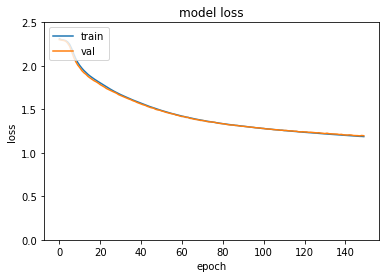

In [4]:
plot_loss(history)

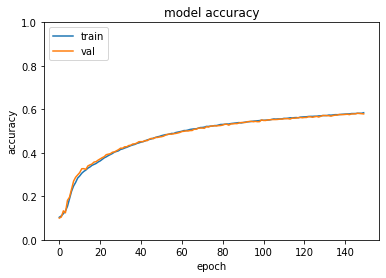

In [5]:
plot_accuracy(history)

In [7]:
## plot results and save history

save_history('part_two', history)